# DEMO in PyconSG 2016

Laam loves music. He likes Adele, The Beatles and Paganni. Let's explore his music world

## Preparation

In [19]:
import cPickle as pickle

songs = pickle.load(open("/Users/laam/projects/guplay/meta/songs_282K_updated_29feb.p", 'rb'))

In [20]:
print len(songs)
print songs[12]

282981
{'sartist': u'C\u1ea9m Ly', 'scover': u'http://st.cdn.nhacso.net/images/album/2011/08/31/1178050012/13147847315_4077_120x120.jpg', 'sname': u'Ng\xe0n N\u0103m V\u1eabn \u0110\u1ee3i', 'slink': u'http://nhacso.net/nghe-nhac/ngan-nam-van-doi.WFtUU0Nd.html', 'sid': '635002'}


In [21]:
def get_song_info(sid):
    for s in songs:
        if s['sid'] == sid:
            return s
    return None

song2ix = {s['sid']: i for i, s in enumerate(songs)}

In [22]:
get_song_info('452138')

{'sartist': u'The Beatles',
 'scover': u'http://st.cdn.nhacso.net/images/album/2011/06/15/1178050012/13081092994_6719_120x120.jpg',
 'sid': '452138',
 'slink': u'http://nhacso.net/nghe-nhac/free-as-a-bird.Wl1TUkBX.html',
 'sname': u'Free As a Bird'}

## Magic transformer

In [23]:
import numpy as np
from gensim.models import Doc2Vec

pv = Doc2Vec.load("/Users/laam/projects/guplay/models/guplay_dbow_5ns_100features_2mw_r72_c800k")
print pv

Doc2Vec(dbow+w,d100,n5,w8,mc2,s0.001,t4)


## Lam loves The Beatles music

In [24]:
print "The Beatles: Free as a bird --> IX: ", song2ix['452138']
print "Song meta ", songs[song2ix['452138']]
print "Song vec ", pv['452138'] 

The Beatles: Free as a bird --> IX:  121901
Song meta  {'sartist': u'The Beatles', 'scover': u'http://st.cdn.nhacso.net/images/album/2011/06/15/1178050012/13081092994_6719_120x120.jpg', 'sname': u'Free As a Bird', 'slink': u'http://nhacso.net/nghe-nhac/free-as-a-bird.Wl1TUkBX.html', 'sid': '452138'}
Song vec  [-0.11250623 -0.15591483 -0.14036672 -0.21781129 -0.42804015  0.66027981
 -0.93176329 -0.53166783 -0.27113673  0.05120657 -0.89181417  0.68065351
  0.75027412  0.93332803 -0.49508557 -0.33182776  0.30329555  0.261792
 -0.03692063  0.15234563  0.50873911 -0.50230002 -0.38006914  0.35814646
  0.67726219 -0.28963915  0.3310931   0.0362886  -0.27803072  0.46044725
 -0.2695027  -0.11704667  0.73084313  0.59103292  0.1752384   0.30406141
  0.78836089  0.1748715  -0.53995275 -0.06316917 -0.8664363  -0.43318033
  0.13123061 -0.13482347  0.20698616  0.31671765  0.39040503 -0.65552652
  0.0142319   0.27015162 -0.79906315 -0.02278325  0.74994814  0.40496704
 -0.37841922  0.41732845  0.063321

## WTH? I hates the maths. Can we see something more beautiful? Let's do vec2image

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set("poster")
%matplotlib inline

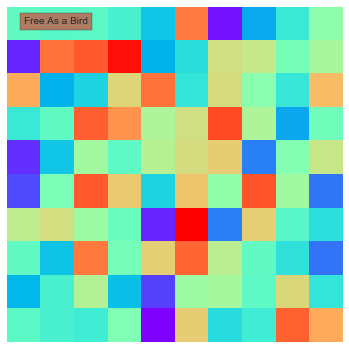

In [26]:
songid = '452138'
songavatar = pv[songid].reshape(10,10)
songname = get_song_info(songid)['sname']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

ax.imshow(songavatar, cmap=plt.cm.rainbow, interpolation='nearest');
ax.text(0, 0, str(songname), bbox=dict(facecolor='red', alpha=0.5));

## Some of Adele

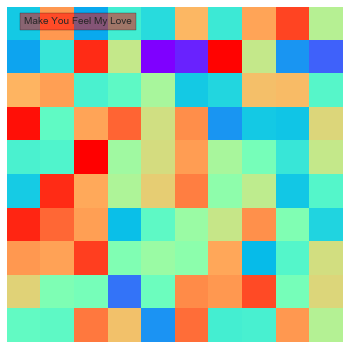

In [27]:
songid = '361436'
songavatar = pv[songid].reshape(10,10)
songname = get_song_info(songid)['sname']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

ax.imshow(songavatar, cmap=plt.cm.rainbow, interpolation='nearest');
ax.text(0, 0, str(songname), bbox=dict(facecolor='red', alpha=0.5));

## Some of Paganini

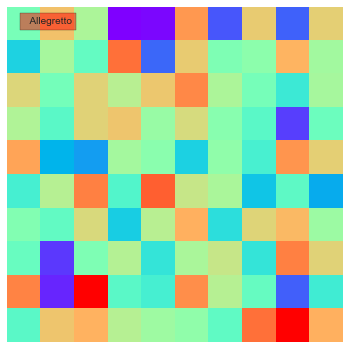

In [28]:
songid = '1033877'
songavatar = pv[songid].reshape(10,10)
songname = get_song_info(songid)['sname']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

ax.imshow(songavatar, cmap=plt.cm.rainbow, interpolation='nearest');
ax.text(0, 0, str(songname), bbox=dict(facecolor='red', alpha=0.5));

## What is Laam's music vector?

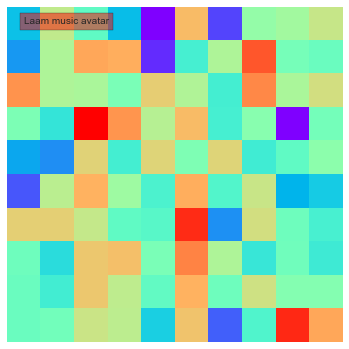

In [29]:
# naive way: sum what he likes, subtract the dislikes
my_songs = ['452138', '361436', '1033877']
people_songs = ['1029965']

songavatars = [pv[songid] for songid in my_songs] + [-1. * pv[songid] for songid in people_songs ]
my_avatar = np.sum(songavatars, axis=0)
my_avatar = my_avatar.reshape((10,10))
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

ax.imshow(my_avatar, cmap=plt.cm.rainbow, interpolation='nearest');
ax.text(0, 0, str("Laam music avatar"), bbox=dict(facecolor='red', alpha=0.5));

In [30]:
# more sophisticated
my_plays = ['1033877', '452138', '361436', '1033877', '1033877']
my_avatar_play = pv.infer_vector(my_plays, steps=12)

for s,v in pv.most_similar([my_avatar_play]):
    print s, get_song_info(s)['sname'].strip(), v

1033877 Allegretto 0.636132419109
1298830 Paganini - Moto Perpetuo Op. 11 - M. Rabin 0.633259654045
486458 Pjanoo 0.586102902889
486436 The Rock 0.580841720104
486382 Something Better 0.576846182346
362652 Blackbird - Yesterday 0.576147437096
552189 Rain On Your Parade 0.574986577034
749318 Aimer Deja 0.57282102108
538216 Ain't Too Proud To Beg 0.561250448227
486384 World, Hold On (Joachim Garraud & David Guetta Rmx) 0.558664321899


## What are excited in my brain?

In [31]:
print "Top 10 of music neurals excited: ", np.argsort(my_avatar.flatten())[-10:]

Top 10 of music neurals excited:  [99 12 33 20 27 75 17 65 98 32]


## Give me some similar songs like Paganini?

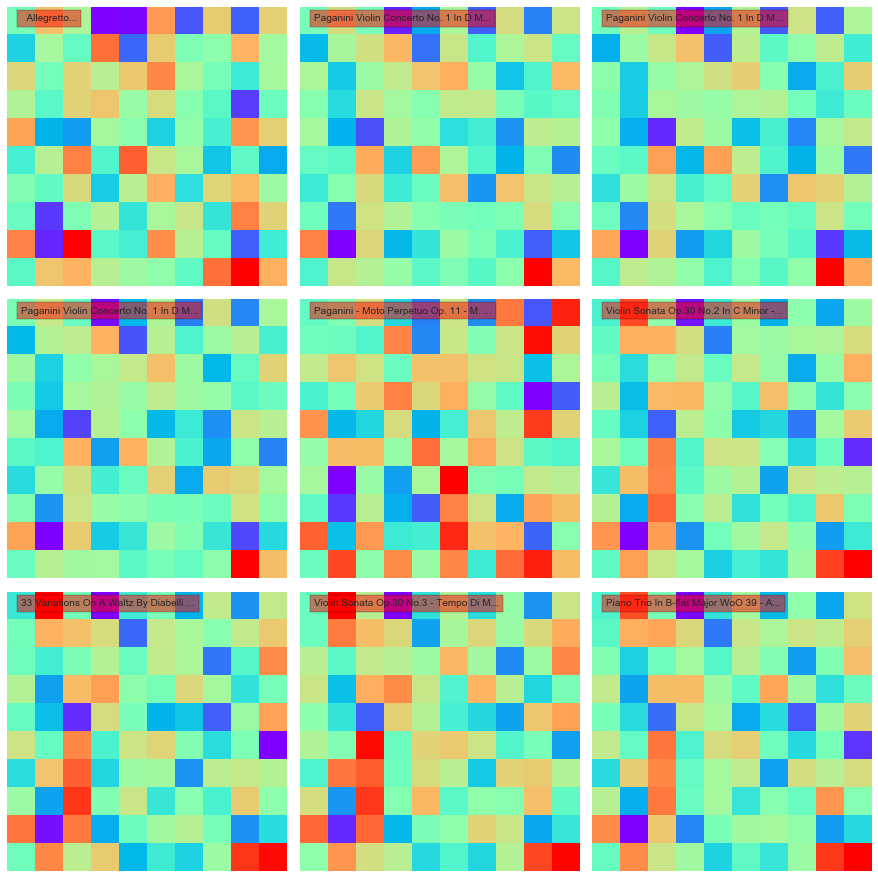

In [32]:
songid = '1033877'
songavatar = pv[songid].reshape(10,10)
# set up the figure
fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i, sv in enumerate(pv.most_similar_cosmul([songavatar.ravel()], topn=9)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    songimg = pv[sv[0]].reshape(10,10)
    songname = get_song_info(sv[0])['sname']
    ax.imshow(songimg, cmap=plt.cm.rainbow, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 0, str(songname[:37] + '...'), bbox=dict(facecolor='red', alpha=0.5))

## Personalized playlist

In [33]:
# my favourites
my_songs = ['452138', '361436', '1033877']
people_songs = ['1029965']

for s,v in pv.most_similar(positive=my_songs, negative=people_songs, topn=12):
    print s, get_song_info(s)['sname'].strip(), v

350687 Within You Without You 0.693800449371
452160 Real Love 0.686083316803
838281 Une Histoire Sans Faim 0.670484244823
744621 Yes It Is 0.660258412361
552071 Help! Rock 0.66024440527
552067 Lady Madonna Rock 0.659857213497
552064 Eleanor Rigby Rock 0.659039378166
763127 Long, Long, Long 0.658786416054
1037134 Across The Universe 0.658632040024
552065 Eight Days A Week Rock 0.658603310585
744620 Yer Blues 0.657952606678
1037242 Michelle 0.657822728157


In [34]:
# coffee playlist

coffee_playlist = ['377257','415834', '1165280','526065','957569','415830','1267937','1130066']
coffee_playlist_vec = pv.infer_vector(coffee_playlist, steps=12)

for s,v in pv.most_similar([coffee_playlist_vec], topn=12):
    print s, get_song_info(s)['sname'].strip(), v

542999 Don't She Look Good 0.75947612524
415834 LoveStory 0.693562924862
415839 Romance De Amour 0.692811846733
415835 More Than I Can Say 0.691567063332
415830 Romeo & Juliet 0.690441787243
475001 10 I Remember That 0.683727741241
572360 Lemon Tree 0.67400342226
376361 Lambada 0.672011554241
920746 Tìm Lại Bầu Trời 0.66878926754
1285007 Đừng Xa Nữa Nhé 0.666720271111
1285006 Cảm Giác Cô Đơn 0.664628982544
572376 My Heart Will Go On 0.661065936089


## How similar does this playlist with my music?

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
print "Similarity of my music and coffee playlist: ", cosine_similarity([my_avatar_play], [coffee_playlist_vec])[0][0]

Similarity of my music and coffee playlist:  0.266485
